#Load the dataset

CIFAR10 dataset consists of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

x_train, x_test: uint8 arrays of RGB image data with shape (num_samples, 3, 32, 32) 

y_train, y_test: uint8 arrays of category labels (integers in range 0-9) each with shape (num_samples, 1).

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[8]


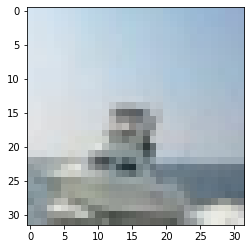

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

# Sample image
plt.imshow(X_train[100])
print(y_train[100])

# Data splitting

other than validation set, lets make a much smaller development set since google colab can crash if we use all available RAM

In [2]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.02, random_state=42)

mask = np.random.choice(49000, 500, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]


In [3]:
# Reshape the images
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print('Train data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Train data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (10000, 3072)
dev data shape:  (500, 3072)


# Multiclass SVM Loss

this loss function performs a sum operation over all the incorrect categories' score where it compares the incorrect categories' score with the correct category score. if the correct score is bigger than the incorrect score by a safe margin (1 in this example) then the asssigned loss is 0 for that particular comparison.

Li = sum(max(0, sj-syi + 1)

In [ ]:
# reg: regularization value (to generalize the model)
def svm_loss(X, y, W, reg):
  num_train = X.shape[0]
  loss = 0.0

  # initialize the gradient as a zero DxC
  dW = np.zeros(W.shape) 

  # NxC matrix representing class scores for each image
  score_matrix = X.dot(W) 
  correct_class_vector = score_matrix[np.arange(score_matrix.shape[0]), y]

  # NxC matrix representing loss incurred from each class for all N images
  loss_matrix = np.maximum(0, np.transpose((np.transpose(score_matrix) - correct_class_vector + 1)))
  loss_matrix[np.arange(loss_matrix.shape[0]), y] = 0

  loss = np.sum(loss_matrix) / loss_matrix.shape[0] + reg * np.sum(W * W)
  
  loss_binary_matrix = np.where(loss_matrix == 0, 0, 1)
  loss_binary_matrix[np.arange(num_train), y] -= np.sum(loss_binary_matrix, axis=1)

  dW = (X.transpose()).dot(loss_binary_matrix)
  dW = dW/num_train + reg*W

  # dw: gradient matrix
  return loss, dW

In [ ]:
import time 

# Initialize the gradient to be a random matrix with small numbers
W = np.random.randn(32*32*3, 10) * 0.0001

# Get the vectorized loss
tic = time.time()
loss_vectorized, _ = svm_loss(X_dev, y_dev, W, 0.000005)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))